# Демо-экзамен по курсу "Прикладной анализ данных". Вариант 2

Выполнил: Гусев Кирилл Денисович

Название ВУЗа, НИЯУ МИФИ

Вставьте ниже скриншот с результатом вашего решения в Leaderboard на Kaggle: https://www.kaggle.com/competitions/lamoda-images-classification/data

*Пример ниже:*

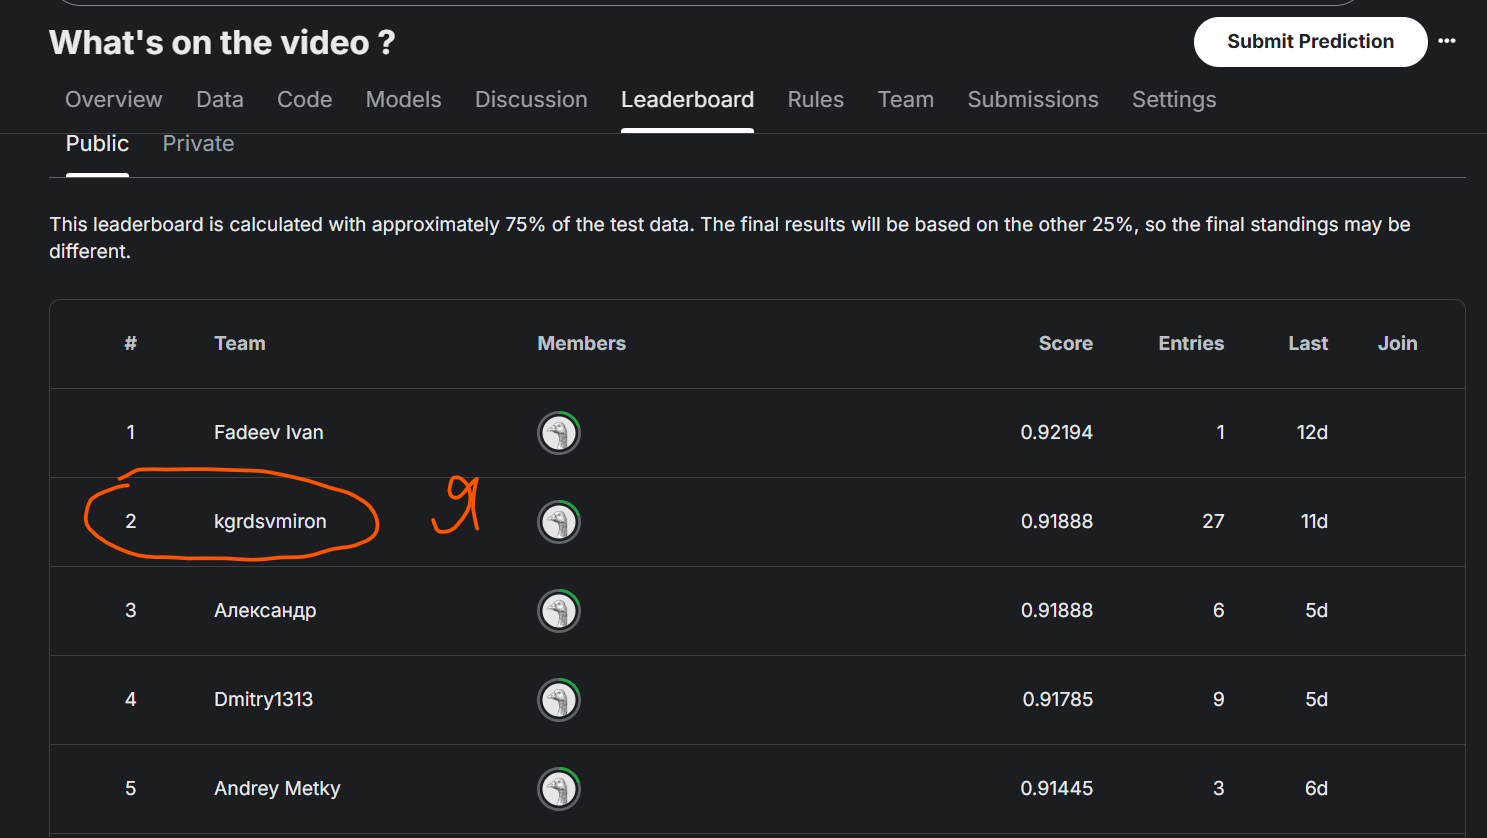

[Текст ссылки](https://)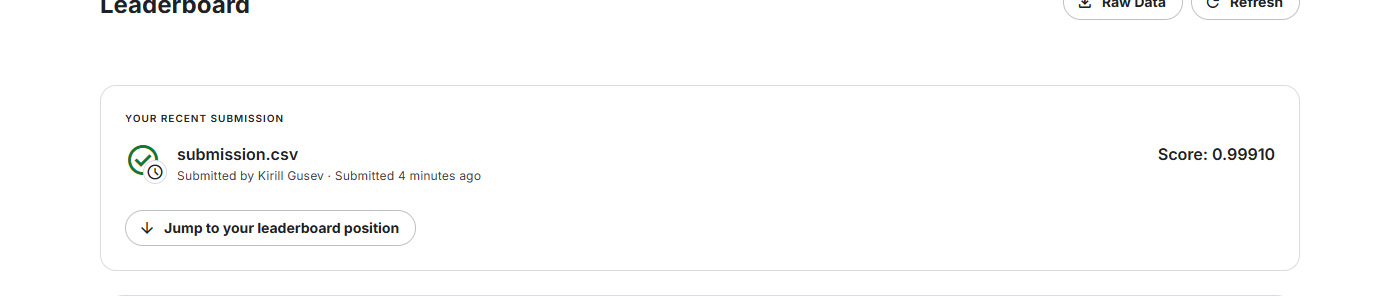

## 1. Описание задачи и данные

В рамках данного задания вам предстоит разработать алгоритм, который автоматически классифицирует изображения предметов одежды на две категории:

- bryuki (брюки),
- bluzy (блузки).

Каждое изображение содержит один предмет одежды на однотонном фоне. Цель — по изображению предсказать, к какому классу принадлежит предмет.

Ссылка на соревнование и на данные: https://www.kaggle.com/competitions/lamoda-images-classification/data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import os
import opendatasets as od
import glob
import random

In [ ]:

!pip install opendatasets --quiet

Небольшая инструкция как напрямую скачать данные с kaggle в Colab ноутбук: https://www.geeksforgeeks.org/python/how-to-import-kaggle-datasets-directly-into-google-colab/

In [ ]:
import opendatasets as od
import pandas as pd

url = 'https://www.kaggle.com/competitions/lamoda-images-classification/'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kirillgusevfff
Your Kaggle Key: ··········


100%|██████████| 265M/265M [00:00<00:00, 546MB/s]



Extracting archive ./lamoda-images-classification/lamoda-images-classification.zip to ./lamoda-images-classification


## 1. Провести предварительное исследование данных

- сколько у вас есть изображений? Все ли они одного разрешения? Какой баланс классов в данных?
- какие есть особенности датасета?
- если необходимо произвести очистку и предварительную обработку данных.

In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

TRAIN_PATH = '/content/lamoda-images-classification/images/train'
TEST_PATH = '/content/lamoda-images-classification/images/test'


print("Количество изображений:")
print(f"Train: {len(os.listdir(TRAIN_PATH))}")
print(f"Test: {len(os.listdir(TEST_PATH))}")
print(f"Total: {len(os.listdir(TRAIN_PATH)) + len(os.listdir(TEST_PATH))}\n")

Количество изображений:
Train: 13476
Test: 3369
Total: 16845



In [ ]:
TRAIN_PATH = '/content/lamoda-images-classification/images/train'
TEST_PATH = '/content/lamoda-images-classification/images/test'

TRAIN_PATH = '/content/lamoda-images-classification/images/train'
TEST_PATH = '/content/lamoda-images-classification/images/test'

def create_image_df(folder_path, is_train=True):
    data = []
    for filename in os.listdir(folder_path):
        full_path = os.path.join(folder_path, filename)


        if is_train:
            if '_bluzy.' in filename.lower():
                label = 'bluzy'
            elif '_bryuki.' in filename.lower():
                label = 'bryuki'
            else:
                continue

        else:
            label = None

        data.append({
            'filepath': full_path,
            'filename': filename,
            'label': label
        })

    return pd.DataFrame(data)


print("Создание train_df...")
train_df = create_image_df(TRAIN_PATH, is_train=True)
print("Создание test_df...")
test_df = create_image_df(TEST_PATH, is_train=False)


print("\nПроверка структуры данных:")
print(f"Train_df колонки: {train_df.columns.tolist()}")
print(f"Test_df колонки: {test_df.columns.tolist()}")
print(f"Train_df размер: {train_df.shape}")
print(f"Test_df размер: {test_df.shape}")


test_files_count = len(os.listdir(TEST_PATH))
print(f"\nФайлов в тестовой папке: {test_files_count}")
print(f"Записей в test_df: {len(test_df)}")

Создание train_df...
Создание test_df...

Проверка структуры данных:
Train_df колонки: ['filepath', 'filename', 'label']
Test_df колонки: ['filepath', 'filename', 'label']
Train_df размер: (13476, 3)
Test_df размер: (3369, 3)

Файлов в тестовой папке: 3369
Записей в test_df: 3369



1. Количество изображений:
Train: 13476
Test: 3369

2. Анализ разрешений изображений:

Анализ разрешений для Train...
Train разрешения:
  (46, 66): 10597 изображений
  (600, 866): 2879 изображений

Анализ разрешений для Test...

Test разрешения:
  (46, 66): 2651 изображений
  (600, 866): 718 изображений

3. Баланс классов:

Train распределение:
label
bluzy     7074
bryuki    6402
Name: count, dtype: int64


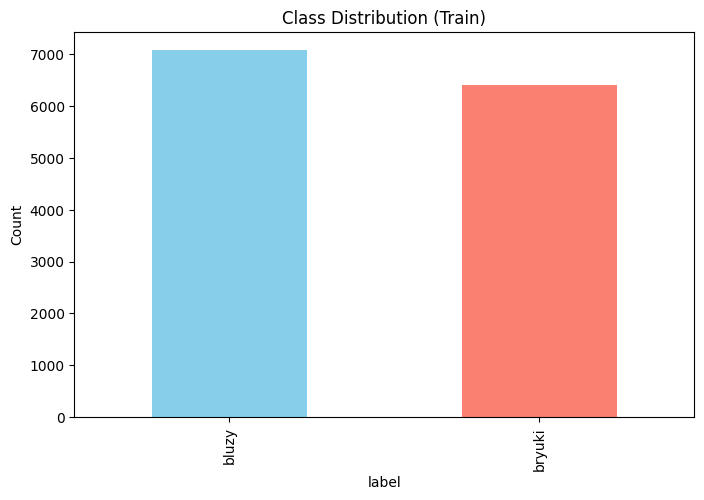


Test распределение:
Series([], Name: count, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

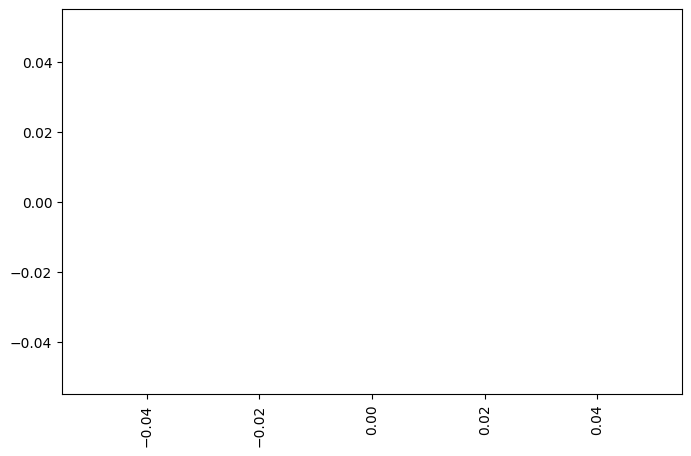

In [ ]:

def analyze_resolutions(df, dataset_name):
    resolutions = {}
    print(f"\nАнализ разрешений для {dataset_name}...")

    for path in df['filepath']:
        try:
            with Image.open(path) as img:
                size = img.size
                resolutions[size] = resolutions.get(size, 0) + 1
        except Exception as e:
            print(f"Ошибка при обработке {path}: {str(e)}")

    return resolutions


print("\n" + "="*50)
print("1. Количество изображений:")
print(f"Train: {len(train_df)}")
print(f"Test: {len(test_df)}")

print("\n" + "="*50)
print("2. Анализ разрешений изображений:")


if not train_df.empty:
    train_res = analyze_resolutions(train_df, "Train")
    print("Train разрешения:")
    for size, count in train_res.items():
        print(f"  {size}: {count} изображений")
else:
    print("Train DataFrame пуст!")


if not test_df.empty:
    test_res = analyze_resolutions(test_df, "Test")
    print("\nTest разрешения:")
    for size, count in test_res.items():
        print(f"  {size}: {count} изображений")
else:
    print("Test DataFrame пуст!")

print("\n" + "="*50)
print("3. Баланс классов:")

if not train_df.empty:
    train_counts = train_df['label'].value_counts()
    print("\nTrain распределение:")
    print(train_counts)

    plt.figure(figsize=(8, 5))
    train_counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Class Distribution (Train)')
    plt.ylabel('Count')
    plt.show()
else:
    print("Нет данных для анализа баланса классов в train")

if not test_df.empty:
    test_counts = test_df['label'].value_counts()
    print("\nTest распределение:")
    print(test_counts)

    plt.figure(figsize=(8, 5))
    test_counts.plot(kind='bar', color=['lightgreen', 'orange'])
    plt.title('Class Distribution (Test)')
    plt.ylabel('Count')
    plt.show()
else:
    print("Нет данных для анализа баланса классов в test")

Тест не нужен так что ошибку забываем, основные моменты видны

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Заново все создаю, чтоб сразу по красоте


def create_dataframe(folder_path, is_train=True):
    data = []
    for filename in os.listdir(folder_path):
        full_path = os.path.join(folder_path, filename)

        if is_train:
            if '_bluzy' in filename.lower():
                label = 'bluzy'
            elif '_bryuki' in filename.lower():
                label = 'bryuki'
            else:
                continue
        else:
            label = None

        data.append({'filepath': full_path, 'label': label})

    return pd.DataFrame(data)

train_df = create_dataframe(TRAIN_PATH, is_train=True)
test_df = create_dataframe(TEST_PATH, is_train=False)

print(f"Train размер до очистки: {train_df.shape}")
print(f"Test размер до очистки: {test_df.shape}")


def verify_image(filepath):
    try:
        with Image.open(filepath) as img:

            if img.width < 10 or img.height < 10:
                return False
            if img.mode not in ['RGB', 'L']:
                return False
            img.verify()
        return True
    except:
        return False


train_df['valid'] = train_df['filepath'].apply(verify_image)
test_df['valid'] = test_df['filepath'].apply(verify_image)

print(f"\nНепрошедшие проверку в train: {len(train_df) - train_df['valid'].sum()}")
print(f"Непрошедшие проверку в test: {len(test_df) - test_df['valid'].sum()}")


train_df = train_df[train_df['valid']].drop(columns=['valid'])
test_df = test_df[test_df['valid']].drop(columns=['valid'])

print(f"\nTrain размер после очистки: {train_df.shape}")
print(f"Test размер после очистки: {test_df.shape}")


TARGET_SIZE = (64, 64)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=42
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=42
)


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col=None,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)


print("\nРезультаты предобработки:")
print(f"Тренировочные данные: {train_generator.samples} изображений")
print(f"Валидационные данные: {val_generator.samples} изображений")
print(f"Тестовые данные: {test_generator.samples} изображений")


if not train_df.empty:
    print("\nБаланс классов в тренировочных данных:")
    print(train_df['label'].value_counts())

Train размер до очистки: (13476, 2)
Test размер до очистки: (3369, 2)

Непрошедшие проверку в train: 8
Непрошедшие проверку в test: 3

Train размер после очистки: (13468, 2)
Test размер после очистки: (3366, 2)
Found 10775 validated image filenames belonging to 2 classes.
Found 2693 validated image filenames belonging to 2 classes.
Found 3366 validated image filenames.

Результаты предобработки:
Тренировочные данные: 10775 изображений
Валидационные данные: 2693 изображений
Тестовые данные: 3366 изображений

Баланс классов в тренировочных данных:
label
bluzy     7074
bryuki    6394
Name: count, dtype: int64


## 2. Подготовить данные для обучения

- Создать тренировочную и тестовую подвыборки для обучения и тестирования работы моделей
- Создать класс на фреймворке `PyTorch` для создания датасета
- Создать `loader` для передачи данных в модель нейронной сети

In [ ]:
from sklearn.model_selection import train_test_split


train_files = train_df['filepath'].values
train_labels = train_df['label'].map({'bluzy': 0, 'bryuki': 1}).values


X_train, X_val, y_train, y_val = train_test_split(
    train_files,
    train_labels,
    test_size=0.2,
    stratify=train_labels,
    random_state=42
)


test_files = test_df['filepath'].values

print(f"Тренировочные данные: {len(X_train)} изображений")
print(f"Валидационные данные: {len(X_val)} изображений")
print(f"Тестовые данные: {len(test_files)} изображений")
print(f"Соотношение классов в тренировочных данных: {np.unique(y_train, return_counts=True)}")

Тренировочные данные: 10774 изображений
Валидационные данные: 2694 изображений
Тестовые данные: 3366 изображений
Соотношение классов в тренировочных данных: (array([0, 1]), array([5659, 5115]))


In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms


train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class ClothingDataset(Dataset):
    def __init__(self, file_paths, labels=None, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        if self.labels is not None:
            label = self.labels[idx]
            return image, torch.tensor(label, dtype=torch.long)
        return image

In [ ]:
from torch.utils.data import DataLoader


train_dataset = ClothingDataset(X_train, y_train, transform=train_transform)
val_dataset = ClothingDataset(X_val, y_val, transform=val_test_transform)
test_dataset = ClothingDataset(test_files, transform=val_test_transform)


BATCH_SIZE = 64
NUM_WORKERS = 2


train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)


print(f"Количество батчей в train_loader: {len(train_loader)}")
print(f"Количество батчей в val_loader: {len(val_loader)}")
print(f"Количество батчей в test_loader: {len(test_loader)}")


sample_batch = next(iter(train_loader))
print(f"\nРазмер батча изображений: {sample_batch[0].shape}")
print(f"Размер батча меток: {sample_batch[1].shape}")

Количество батчей в train_loader: 169
Количество батчей в val_loader: 43
Количество батчей в test_loader: 53

Размер батча изображений: torch.Size([64, 3, 64, 64])
Размер батча меток: torch.Size([64])


## 3. Реализация модели

- создать класс для модели
- создать функцию для обучения модели
- создать функцию для валидации модели

In [ ]:
import torch.nn as nn
import torchvision.models as models
from torch.nn import functional as F

class ClothingClassifier(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super(ClothingClassifier, self).__init__()


        self.backbone = models.efficientnet_b0(pretrained=pretrained)


        in_features = self.backbone.classifier[1].in_features
        self.backbone.classifier = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(p=0.2),
            nn.Linear(512, num_classes))

    def forward(self, x):
        return self.backbone(x)


if __name__ == '__main__':
    model = ClothingClassifier()
    print(model)
    dummy_input = torch.randn(2, 3, 64, 64)
    output = model(dummy_input)
    print(f"Выходной размер: {output.size()}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 102MB/s]


ClothingClassifier(
  (backbone): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              

In [ ]:
import torch
from tqdm import tqdm
import numpy as np

def train_one_epoch(model, train_loader, optimizer, loss_fn, device, scheduler=None, epoch=None):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0


    pbar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}")

    for batch_idx, (inputs, targets) in pbar:
        inputs, targets = inputs.to(device), targets.to(device)


        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)


        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()


        avg_loss = running_loss / (batch_idx + 1)
        acc = 100. * correct / total
        pbar.set_postfix(loss=avg_loss, accuracy=acc)


    if scheduler:
        scheduler.step()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc

In [ ]:
@torch.no_grad()
def valid_one_epoch(model, val_loader, loss_fn, device, epoch=None):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_targets = []
    all_preds = []

    pbar = tqdm(enumerate(val_loader), total=len(val_loader), desc=f"Validation {epoch+1}")

    for batch_idx, (inputs, targets) in pbar:
        inputs, targets = inputs.to(device), targets.to(device)


        outputs = model(inputs)
        loss = loss_fn(outputs, targets)


        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()


        all_targets.extend(targets.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())


        avg_loss = running_loss / (batch_idx + 1)
        acc = 100. * correct / total
        pbar.set_postfix(loss=avg_loss, accuracy=acc)

    epoch_loss = running_loss / len(val_loader)
    epoch_acc = 100. * correct / total


    from sklearn.metrics import precision_score, recall_score, f1_score

    precision = precision_score(all_targets, all_preds, average='binary')
    recall = recall_score(all_targets, all_preds, average='binary')
    f1 = f1_score(all_targets, all_preds, average='binary')

    print(f"Val Metrics: Acc={epoch_acc:.2f}%, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")

    return epoch_loss, epoch_acc, f1

## 4. Обучение модели
*   Определить необходимые параметры для обучения модели (learning rate, optimizer, loss function, etc)
*   Реализовать процесс обучения модели
*   Оценить эффективность работы модели



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


model = ClothingClassifier(num_classes=2).to(device)


criterion = nn.CrossEntropyLoss()


optimizer = optim.AdamW(model.parameters(),
                        lr=0.001,
                        weight_decay=0.01)


scheduler = ReduceLROnPlateau(optimizer,
                              mode='max',
                              factor=0.5,
                              patience=2,
                              verbose=True)


NUM_EPOCHS = 15
EARLY_STOPPING_PATIENCE = 5

Using device: cpu


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
import numpy as np
from tqdm import tqdm
import copy


best_f1 = 0.0
best_model_wts = copy.deepcopy(model.state_dict())
early_stop_counter = 0


history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'val_f1': []
}

for epoch in range(NUM_EPOCHS):
    print(f"\n{'='*50}")
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")


    train_loss, train_acc = train_one_epoch(
        model, train_loader, optimizer, criterion, device, epoch=epoch
    )


    val_loss, val_acc, val_f1 = valid_one_epoch(
        model, val_loader, criterion, device, epoch=epoch
    )


    scheduler.step(val_f1)


    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['val_f1'].append(val_f1)


    if val_f1 > best_f1:
        print(f"Validation F1 improved from {best_f1:.4f} to {val_f1:.4f}")
        best_f1 = val_f1
        best_model_wts = copy.deepcopy(model.state_dict())
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        print(f"Early stopping counter: {early_stop_counter}/{EARLY_STOPPING_PATIENCE}")


    if early_stop_counter >= EARLY_STOPPING_PATIENCE:
        print(f"Early stopping triggered at epoch {epoch+1}")
        break


model.load_state_dict(best_model_wts)
torch.save(model.state_dict(), 'best_model.pth')
print(f"\nTraining complete! Best Validation F1: {best_f1:.4f}")


Epoch 1/15


Validation 1: 100%|██████████| 43/43 [00:09<00:00,  4.43it/s, accuracy=99.7, loss=0.0158]

Val Metrics: Acc=99.70%, Precision=0.9961, Recall=0.9977, F1=0.9969
Validation F1 improved from 0.0000 to 0.9969

Epoch 2/15



Validation 2: 100%|██████████| 43/43 [00:11<00:00,  3.83it/s, accuracy=99.8, loss=0.012]

Val Metrics: Acc=99.81%, Precision=0.9977, Recall=0.9984, F1=0.9980
Validation F1 improved from 0.9969 to 0.9980

Epoch 3/15



Validation 3: 100%|██████████| 43/43 [00:09<00:00,  4.39it/s, accuracy=99.7, loss=0.0128]

Val Metrics: Acc=99.74%, Precision=0.9984, Recall=0.9961, F1=0.9973
Early stopping counter: 1/5

Epoch 4/15



Validation 4: 100%|██████████| 43/43 [00:09<00:00,  4.35it/s, accuracy=99.8, loss=0.0101]

Val Metrics: Acc=99.81%, Precision=0.9992, Recall=0.9969, F1=0.9980
Early stopping counter: 2/5

Epoch 5/15



Validation 5: 100%|██████████| 43/43 [00:09<00:00,  4.30it/s, accuracy=99.8, loss=0.00897]

Val Metrics: Acc=99.81%, Precision=0.9992, Recall=0.9969, F1=0.9980
Early stopping counter: 3/5

Epoch 6/15



Validation 6: 100%|██████████| 43/43 [00:09<00:00,  4.40it/s, accuracy=99.9, loss=0.00999]

Val Metrics: Acc=99.89%, Precision=0.9992, Recall=0.9984, F1=0.9988
Validation F1 improved from 0.9980 to 0.9988

Epoch 7/15



Validation 7: 100%|██████████| 43/43 [00:10<00:00,  4.22it/s, accuracy=99.9, loss=0.00981]

Val Metrics: Acc=99.85%, Precision=0.9984, Recall=0.9984, F1=0.9984
Early stopping counter: 1/5

Epoch 8/15



Validation 8: 100%|██████████| 43/43 [00:10<00:00,  4.18it/s, accuracy=99.8, loss=0.0105]

Val Metrics: Acc=99.81%, Precision=0.9984, Recall=0.9977, F1=0.9980
Early stopping counter: 2/5

Epoch 9/15



Validation 9: 100%|██████████| 43/43 [00:10<00:00,  4.23it/s, accuracy=99.8, loss=0.0098]

Val Metrics: Acc=99.81%, Precision=1.0000, Recall=0.9961, F1=0.9980
Early stopping counter: 3/5

Epoch 10/15



Validation 10: 100%|██████████| 43/43 [00:10<00:00,  4.28it/s, accuracy=99.9, loss=0.00834]

Val Metrics: Acc=99.85%, Precision=0.9984, Recall=0.9984, F1=0.9984
Early stopping counter: 4/5

Epoch 11/15



Validation 11: 100%|██████████| 43/43 [00:10<00:00,  4.29it/s, accuracy=99.9, loss=0.00887]

Val Metrics: Acc=99.85%, Precision=0.9984, Recall=0.9984, F1=0.9984
Early stopping counter: 5/5
Early stopping triggered at epoch 11

Training complete! Best Validation F1: 0.9988


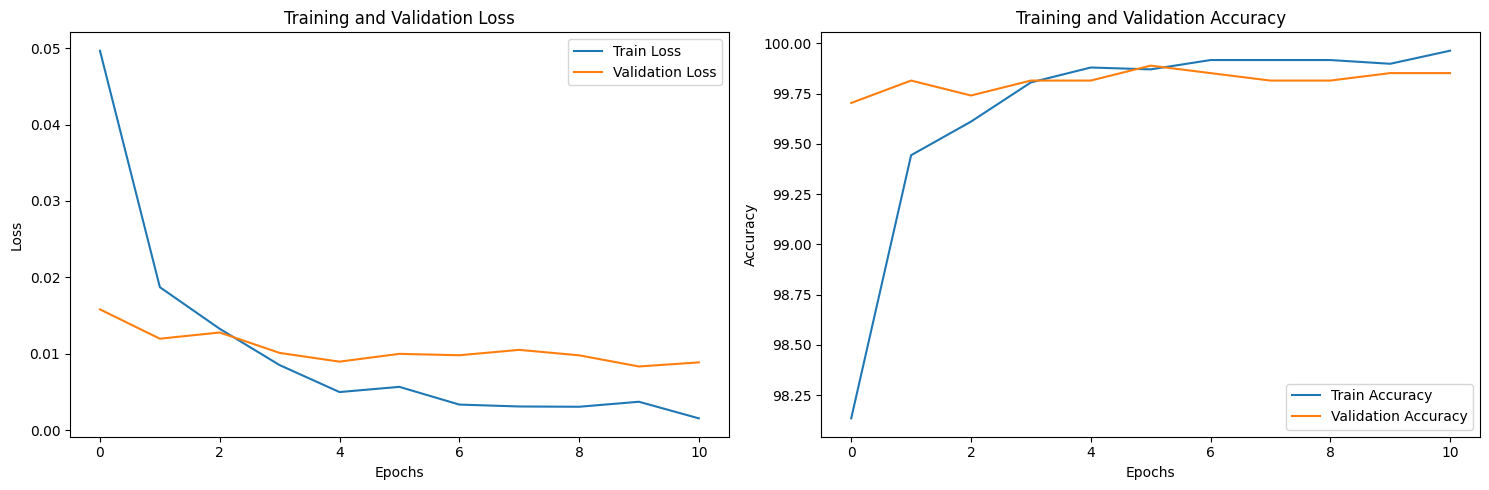

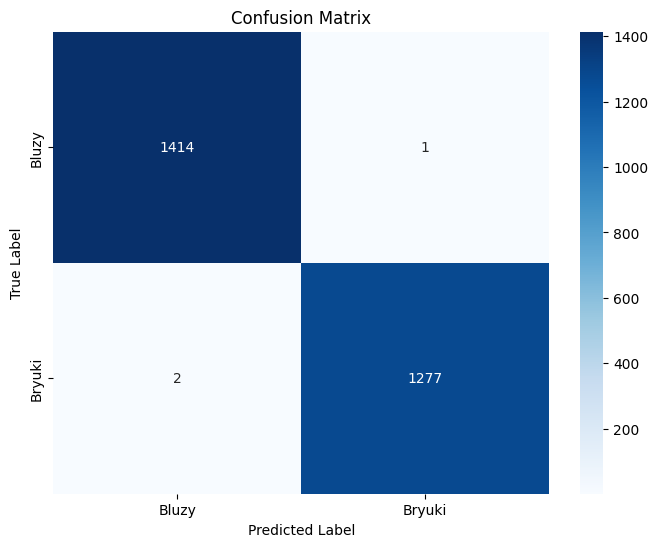


Classification Report:
              precision    recall  f1-score   support

       Bluzy       1.00      1.00      1.00      1415
      Bryuki       1.00      1.00      1.00      1279

    accuracy                           1.00      2694
   macro avg       1.00      1.00      1.00      2694
weighted avg       1.00      1.00      1.00      2694

Final Validation Accuracy: 0.9989
Best Validation F1-score: 0.9988


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())


cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bluzy', 'Bryuki'],
            yticklabels=['Bluzy', 'Bryuki'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


print("\nClassification Report:")
print(classification_report(all_targets, all_preds,
                            target_names=['Bluzy', 'Bryuki']))


accuracy = np.mean(np.array(all_targets) == np.array(all_preds))
print(f"Final Validation Accuracy: {accuracy:.4f}")
print(f"Best Validation F1-score: {best_f1:.4f}")

## 5. Экспериментальная часть

- протестировать не менее 3х разных моделей для решения задачи
- сравнить их эффективность (по метрикам и потерям)
- сделать выводы

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models


class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


class SimpleLeNet(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleLeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 13 * 13)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class LightMobileNet(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.model = models.mobilenet_v3_small(pretrained=True)

        for param in self.model.parameters():
            param.requires_grad = False

        in_features = self.model.classifier[3].in_features
        self.model.classifier[3] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)


model_configs = [
    {"name": "SimpleCNN", "class": SimpleCNN},
    {"name": "SimpleLeNet", "class": SimpleLeNet},
    {"name": "LightMobileNet", "class": LightMobileNet}
]


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
EPOCHS = 5

In [ ]:
import time
from sklearn.metrics import f1_score

def train_and_evaluate(model_class, model_name):
    print(f"\n{'='*50}")
    print(f"Training {model_name}")


    model = model_class().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


    history = {'train_loss': [], 'val_f1': [], 'time_per_epoch': []}
    best_f1 = 0


    for epoch in range(EPOCHS):
        start_time = time.time()
        model.train()
        train_loss = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()


        model.eval()
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(labels.cpu().numpy())


        val_f1 = f1_score(all_targets, all_preds, average='binary')
        epoch_time = time.time() - start_time


        avg_train_loss = train_loss / len(train_loader)
        history['train_loss'].append(avg_train_loss)
        history['val_f1'].append(val_f1)
        history['time_per_epoch'].append(epoch_time)

        print(f"Epoch {epoch+1}/{EPOCHS} | "
              f"Loss: {avg_train_loss:.4f} | "
              f"Val F1: {val_f1:.4f} | "
              f"Time: {epoch_time:.1f}s")

        if val_f1 > best_f1:
            best_f1 = val_f1

    return {
        'name': model_name,
        'best_f1': best_f1,
        'final_loss': history['train_loss'][-1],
        'avg_time': sum(history['time_per_epoch']) / EPOCHS,
        'history': history
    }


Training SimpleCNN
Epoch 1/5 | Loss: 0.1314 | Val F1: 0.9889 | Time: 36.7s
Epoch 2/5 | Loss: 0.0429 | Val F1: 0.9945 | Time: 35.3s
Epoch 3/5 | Loss: 0.0376 | Val F1: 0.9949 | Time: 35.1s
Epoch 4/5 | Loss: 0.0259 | Val F1: 0.9953 | Time: 35.4s
Epoch 5/5 | Loss: 0.0226 | Val F1: 0.9917 | Time: 34.5s

SimpleCNN completed. Best F1: 0.9953

Training SimpleLeNet
Epoch 1/5 | Loss: 0.1371 | Val F1: 0.9894 | Time: 27.8s
Epoch 2/5 | Loss: 0.0522 | Val F1: 0.9874 | Time: 27.6s
Epoch 3/5 | Loss: 0.0387 | Val F1: 0.9953 | Time: 27.6s
Epoch 4/5 | Loss: 0.0313 | Val F1: 0.9977 | Time: 28.3s


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


Epoch 5/5 | Loss: 0.0285 | Val F1: 0.9905 | Time: 27.7s

SimpleLeNet completed. Best F1: 0.9977

Training LightMobileNet


100%|██████████| 9.83M/9.83M [00:00<00:00, 136MB/s]


Epoch 1/5 | Loss: 0.3261 | Val F1: 0.9133 | Time: 29.9s
Epoch 2/5 | Loss: 0.2495 | Val F1: 0.9059 | Time: 29.0s
Epoch 3/5 | Loss: 0.2578 | Val F1: 0.8732 | Time: 29.3s
Epoch 4/5 | Loss: 0.2698 | Val F1: 0.8984 | Time: 28.7s
Epoch 5/5 | Loss: 0.2647 | Val F1: 0.8971 | Time: 29.2s

LightMobileNet completed. Best F1: 0.9133


Model Comparison Results:

Model: SimpleCNN
Best F1: 0.9953
Final Loss: 0.0226
Avg Time per Epoch: 35.4s

Model: SimpleLeNet
Best F1: 0.9977
Final Loss: 0.0285
Avg Time per Epoch: 27.8s

Model: LightMobileNet
Best F1: 0.9133
Final Loss: 0.2647
Avg Time per Epoch: 29.2s


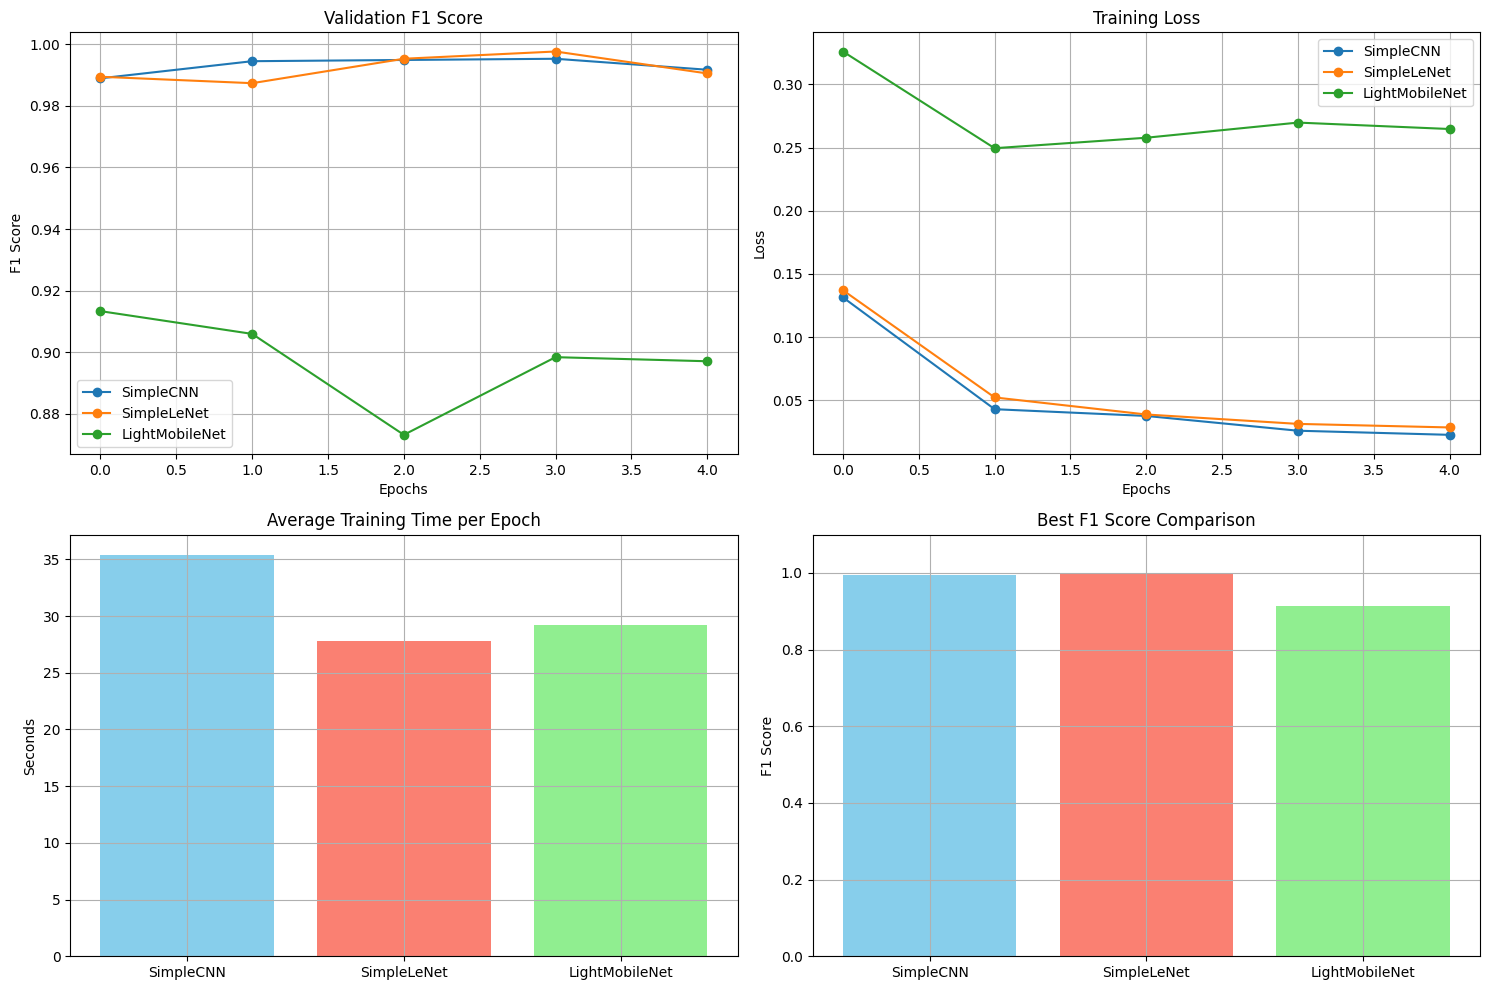


Best model: SimpleLeNet with F1=0.9977


In [ ]:

results = []

for config in model_configs:
    model_result = train_and_evaluate(config["class"], config["name"])
    results.append(model_result)
    print(f"\n{config['name']} completed. Best F1: {model_result['best_f1']:.4f}")

print("\n\n" + "="*50)
print("Model Comparison Results:")
print("="*50)

for res in results:
    print(f"\nModel: {res['name']}")
    print(f"Best F1: {res['best_f1']:.4f}")
    print(f"Final Loss: {res['final_loss']:.4f}")
    print(f"Avg Time per Epoch: {res['avg_time']:.1f}s")

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for res in results:
    plt.plot(res['history']['val_f1'], 'o-', label=res['name'])
plt.title('Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for res in results:
    plt.plot(res['history']['train_loss'], 'o-', label=res['name'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
times = [res['avg_time'] for res in results]
names = [res['name'] for res in results]
plt.bar(names, times, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average Training Time per Epoch')
plt.ylabel('Seconds')
plt.grid(True)

plt.subplot(2, 2, 4)
f1_scores = [res['best_f1'] for res in results]
plt.bar(names, f1_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Best F1 Score Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1.1)
plt.grid(True)

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

best_model = max(results, key=lambda x: x['best_f1'])
print(f"\nBest model: {best_model['name']} with F1={best_model['best_f1']:.4f}")

В результате лучшим вариантом оказалась первоначальная модель!